# Time Response of Second-Order Systems

## Python Control System Toolbox
If you are running this code at your local computer where the python control system toolbox is already installed skip or uncomment the following line.

In [19]:
%pip install control

Note: you may need to restart the kernel to use updated packages.


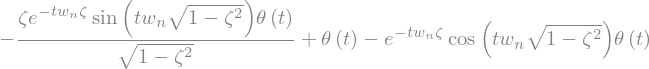

In [20]:
import sympy as sym

s = sym.symbols('s')
t = sym.symbols('t', positve=True)
a, zeta = sym.symbols('a, zeta', real=True)
w, w_n = sym.symbols('w, w_n', positive=True)
w = w_n*sym.sqrt(1-zeta**2)
a = zeta*w_n
Y = w_n**2 / ((s+a)**2 + w**2) / s

y = sym.inverse_laplace_transform(Y, s, t)
sym.init_printing()
display(sym.simplify(y))

## Time-Response



Text(0, 0.5, 'y')

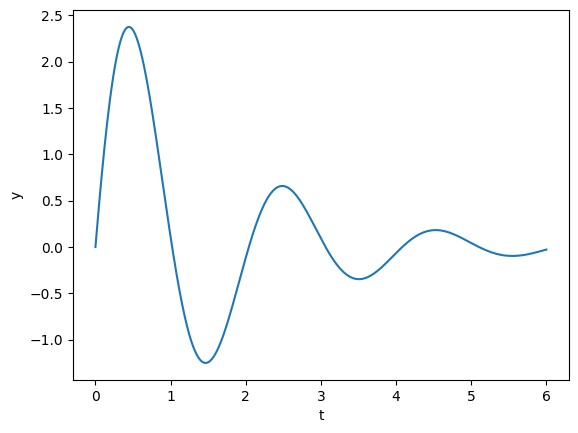

In [21]:
import control 
import numpy as np
import matplotlib.pyplot as plt

# definte transfer function
wn = np.pi
zeta = 0.2
sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])

# compute impulse response
t = np.linspace(0,6,501)
t, y = control.impulse_response(sysG, t)

# generate plot
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y')



### Impulse Response 

Impulse response for varying $\zeta$ when $\omega_n=1$

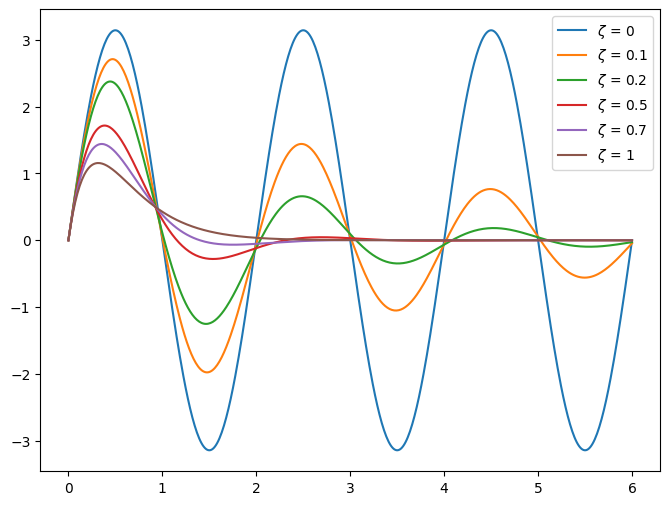

In [31]:

wn=np.pi

# for zeta in [-0.1]:
plt.figure(figsize=(8,6))
for zeta in [0, 0.1, 0.2, 0.5, 0.7, 1]:    
    sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])
    t = np.linspace(0,6,501)
    t, y = control.impulse_response(sysG,t)
    plt.plot(t,y,label=f'$\zeta$ = {zeta}')
    
plt.legend()



Impulse response for varing $\omega_n$

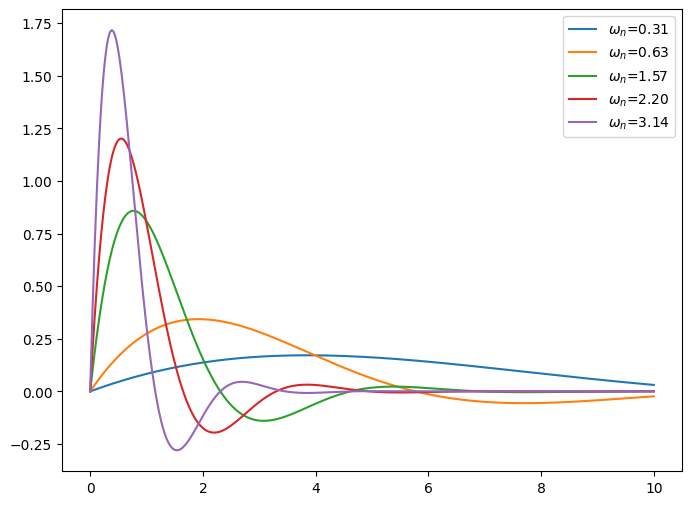

In [32]:
zeta=0.5

plt.figure(figsize=(8,6))
for wn in np.array([0.1, 0.2, 0.5, 0.7, 1])*np.pi:
    sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])
    t = np.linspace(0,10,501)
    t, y = control.impulse_response(sysG,t)
    plt.plot(t,y,label=f'$\omega_n$={wn:.2f}')
    
plt.legend()


### Step Response

Step response for varying $\zeta$ when $\omega_n=\pi$

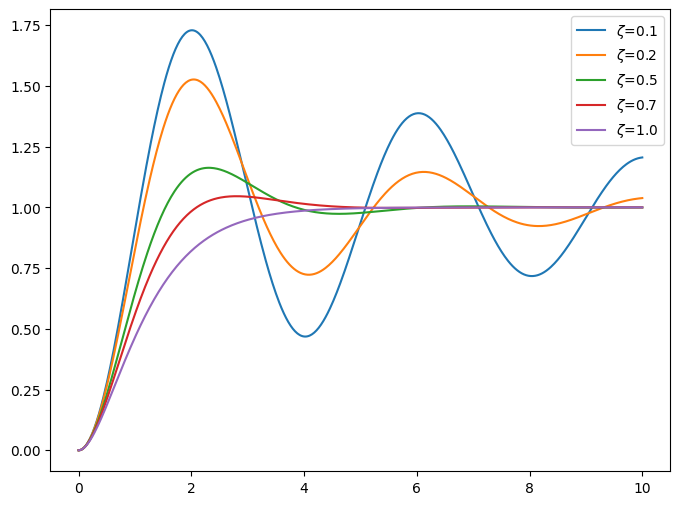

In [33]:
wn=np.pi*0.5

plt.figure(figsize=(8,6))
for zeta in np.array([0.1, 0.2, 0.5, 0.7, 1]):
    sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])
    t = np.linspace(0,10,501)
    t, y = control.step_response(sysG,t)
    plt.plot(t,y, label=f'$\zeta$={zeta}')

plt.legend()


Step response for varying $\omega_n$ when $\zeta=0.5$

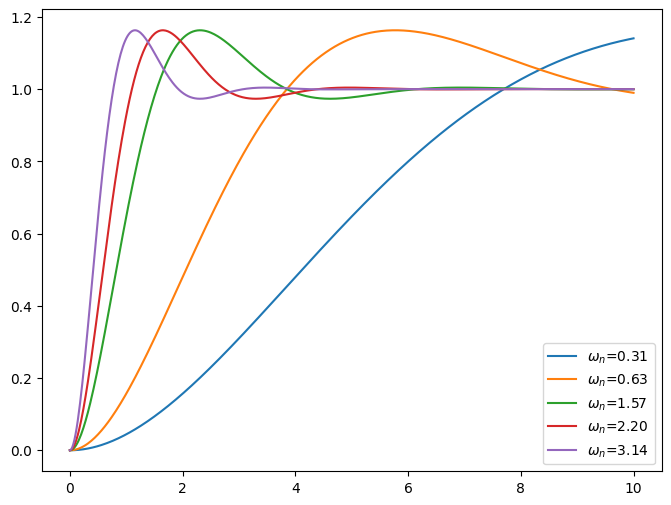

In [34]:
zeta=0.5

plt.figure(figsize=(8,6))
for wn in np.array([0.1, 0.2, 0.5, 0.7, 1])*np.pi:
    sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])
    t = np.linspace(0,10,501)
    t, y = control.step_response(sysG,t)
    plt.plot(t,y,label=f'$\omega_n$={wn:.2f}')
    
plt.legend()
